In [17]:
from utils import *

%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
with open('../data/ref_genes.json', 'rb') as f:
    ref_genes = json.load(f) # This gets loaded as a list, need to make sure the genes are represented as tuples for this to work.
    ref_genes = {target_name:[tuple(gene) for gene in genes] for target_name, genes in ref_genes.items()}

In [19]:
m00530_kos = ['K00370', 'K00371', 'K00374', 'K02567', 'K02568', 'K00362', 'K00363' 'K03385', 'K15876'] # https://www.kegg.jp/module/M00530
m00531_kos = ['K00367', 'K10534', 'K00372', 'K00360', 'K00366', 'K17877', 'K26139', 'K26138', 'K00361']

# What are the Methanoperedens in the reactor using as the terminal electron acceptor? Not immediately obvious that they are reducing nitrate.

In [20]:
# Also want to look at the differences between the ck and nitrate bioreactors. 

metat_df = metat_load()

mp_metat_df = metat_df[is_mp(metat_df)].copy()
# mp_metat_df = mp_metat_df[mp_metat_df.target_name != 'mp_2'].copy() # mp_2 is incomplete, don't trust it. 
mp_metat_df = pd.concat([metat_filter(df, threshold=10, min_samples=2, field='read_count') for _, df in mp_metat_df.groupby('target_name', group_keys=True)])

interproscan_df = load_interproscan().rename(columns={'id':'gene_id'})[['target_name', 'gene_id', 'signature_description', 'signature_accession', 'e_value']]
interproscan_df = interproscan_df[is_mp(interproscan_df)]
interproscan_df = interproscan_df[interproscan_df.signature_description != '-'].copy()
# interproscan_df = interproscan_df.drop_duplicates(['target_name', 'gene_id'])
mp_metat_df = mp_metat_df.merge(interproscan_df, on=['target_name', 'gene_id'], how='left')
mp_metat_df = mp_metat_df.sort_values('e_value').drop_duplicates(['target_name', 'sample_id', 'gene_id'])

filter_: Keeping 925 out of 2875 total genes for mp_1.
filter_: Keeping 111 out of 613 total genes for mp_2.
filter_: Keeping 518 out of 3055 total genes for mp_3.
filter_: Keeping 526 out of 3537 total genes for mp_4.
filter_: Keeping 590 out of 2733 total genes for mp_5.


In [21]:
kofamscan_df = kofamscan_load()
# kofamscan_df = kofamscan_df[kofamscan_df.score > kofamscan_df.threshold].copy() # Filter for significant hits. 
kofamscan_df = kofamscan_df[kofamscan_df.e_value < 1e-5].copy() # Filter for significant hits. 
# kofamscan_df = kofamscan_df.sort_values('e_value').drop_duplicates(['target_name', 'id'])
kofamscan_df[kofamscan_df.ko.isin(m00530_kos)].sort_values('id')


,id,ko,threshold,score,e_value,definition,target_name
99516,102_1,K15876,117.97,47.6,2.100000e-13,cytochrome c nitrite reductase small subunit,mp_3
72987,10_7,K00362,1308.87,53.7,1.500000e-15,nitrite reductase (NADH) large subunit [EC:1.7...,mp_3
13747,10_7,K00362,1308.87,53.7,1.500000e-15,nitrite reductase (NADH) large subunit [EC:1.7...,mp_4
59868,120_3,K15876,117.97,22.8,9.400000e-06,cytochrome c nitrite reductase small subunit,mp_4
105862,135_5,K15876,117.97,26.7,5.300000e-07,cytochrome c nitrite reductase small subunit,mp_3
106894,146_2,K15876,117.97,27.8,2.400000e-07,cytochrome c nitrite reductase small subunit,mp_3
106918,146_5,K15876,117.97,36.5,5.100000e-10,cytochrome c nitrite reductase small subunit,mp_3
17186,14_12,K15876,117.97,46.6,4.700000e-13,cytochrome c nitrite reductase small subunit,mp_4
17193,14_13,K15876,117.97,22.7,9.800000e-06,cytochrome c nitrite reductase small subunit,mp_4
17378,14_28,K15876,117.97,25.1,1.900000e-06,cytochrome c nitrite reductase small subunit,mp_4


In [24]:
def get_differential_expression(metat_df:pd.DataFrame, var_col='year'):
    diff_df = list()

    sample_metadata_cols = ['location', 'reactor', 'year']
    var_cols = [col for col in metat_df.columns if (re.search('_alr|_clr', col) is not None)] + ['read_count', 'read_count_original', 'coverage', 'sample_id']
    fixed_cols = [col for col in metat_df.columns if (col not in var_cols)]

    for _, df in tqdm(metat_df.groupby([col for col in sample_metadata_cols if (col != var_col)] + ['gene_id', 'target_name']), 'get_differential_expression'):
        comparisons = list(itertools.combinations(df[var_col].unique(), 2))
        df.index = df[var_col] # Set a new index and keep the var_col. 
        for v_1, v_2 in comparisons:
            v_1, v_2 = sorted([v_1, v_2])
            row = df[fixed_cols].iloc[0].to_dict() # Initialize row with fixed metadata
            row[f'{var_col}_1'], row[f'{var_col}_2'] = v_1, v_2 
            row.update({f'{col}_1':value for col, value in df.loc[v_1, var_cols].to_dict().items()})
            row.update({f'{col}_2':value for col, value in df.loc[v_2, var_cols].to_dict().items()})
            diff_df.append(row)

    diff_df = pd.DataFrame(diff_df)
    # No comparisons where both measurements are zero are valid, basically just comparing pseudocounts. 
    mask = (diff_df.read_count_original_1 == 0) & (diff_df.read_count_original_2 == 0)
    print(f'get_differential_expression: Removing {mask.sum()} paired measurements where both measures are zero.')
    return diff_df

# mp_metat_df = metat_normalize(mp_metat_df.copy(), ref_genes=ref_genes, method='alr')
mp_metat_df = metat_normalize(mp_metat_df, ref_genes=dict(), method='clr')

mp_metat_diff_df = get_differential_expression(mp_metat_df, var_col='reactor')
mp_metat_diff_df['read_count_normalized_clr_diff'] = mp_metat_diff_df.read_count_normalized_clr_2 - mp_metat_diff_df.read_count_normalized_clr_1
# mp_metat_diff_df['read_count_normalized_alr_diff'] = mp_metat_diff_df.read_count_normalized_alr_2 - mp_metat_diff_df.read_count_normalized_alr_1

get_differential_expression: 100%|██████████| 16020/16020 [00:15<00:00, 1060.40it/s]


get_differential_expression: Removing 1689 paired measurements where both measures are zero.


In [25]:
print('Compared samples:')
for pair in set(zip(mp_metat_diff_df.sample_id_1, mp_metat_diff_df.sample_id_2)):
    print(' vs. '.join(pair))

Compared samples:
ck_bottom_2024_metat vs. n_bottom_2024_metat
ck_top_2025_metat vs. n_top_2025_metat
ck_middle_2025_metat vs. n_middle_2025_metat
ck_bottom_2025_metat vs. n_bottom_2025_metat


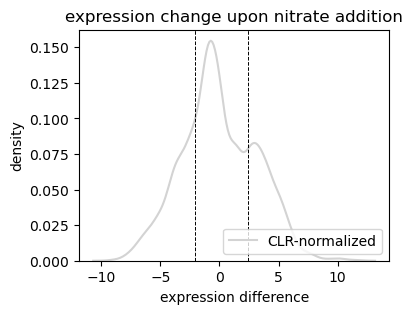

In [28]:
# downregulation_threshold = np.quantile(mp_metat_diff_df.read_count_normalized_alr_diff, 0.25)
# upregulation_threshold = np.quantile(mp_metat_diff_df.read_count_normalized_alr_diff, 0.75)

downregulation_threshold = np.quantile(mp_metat_diff_df.read_count_normalized_clr_diff, 0.25)
upregulation_threshold = np.quantile(mp_metat_diff_df.read_count_normalized_clr_diff, 0.75)

def plot_diff_distribution(diff_df:pd.DataFrame, upregulation_threshold=upregulation_threshold, downregulation_threshold=downregulation_threshold):
    fig, ax = plt.subplots(figsize=(4, 3))
    figure_df = diff_df.copy()
    # sns.kdeplot(figure_df, x='read_count_normalized_alr_diff', label='ALR-normalized', color='gray')
    sns.kdeplot(figure_df, x='read_count_normalized_clr_diff', label='CLR-normalized', color='lightgray')
    ax.set_ylabel('density')
    ax.set_title('expression change upon nitrate addition')
    ax.set_xlabel('expression difference')
    ax.legend()
    sns.move_legend(ax, loc='lower right')
    ax.axvline(downregulation_threshold, ls='--', lw=0.7, color='black')
    ax.axvline(upregulation_threshold, ls='--', lw=0.7, color='black')
    plt.show()

plot_diff_distribution(mp_metat_diff_df)

In [30]:
col = f'read_count_normalized_clr_diff'
n = 2
_is_consistently_regulated = lambda df : (len(df) > 0) and np.all(np.sign(df[col].values) == np.sign(df[col].values[0]))
_is_significantly_regulated = lambda df : _is_consistently_regulated(df) and (((df[col].values < downregulation_threshold).sum() > n) or ((df[col].values > upregulation_threshold).sum() > n))

def is_consistently_regulated(diff_df:pd.DataFrame):
    '''Flag genes that are consistently up- or down- regulated across samples.'''
    genes = [gene for gene, df in diff_df.groupby(['target_name', 'gene_id']) if _is_consistently_regulated(df)]
    print(f'is_consistently_regulated: Found {len(genes)} genes which are consistently-regulated.')
    return get_genes(diff_df, genes)

def is_significantly_regulated(diff_df:pd.DataFrame):
    '''Flag genes that exceed the minimum threshold in at least min_n_samples.'''
    genes = [gene for gene, df in diff_df.groupby(['target_name', 'gene_id']) if _is_significantly_regulated(df)]
    print(f'is_significantly_regulated: Found {len(genes)} genes which are significantly-regulated.')
    return get_genes(diff_df, genes)

mp_metat_diff_df['consistently_regulated'] = is_consistently_regulated(mp_metat_diff_df)
mp_metat_diff_df['significantly_regulated'] = is_significantly_regulated(mp_metat_diff_df)
mp_metat_diff_df = mp_metat_diff_df.sort_values(['read_count_normalized_clr_diff', 'gene_id'])

is_consistently_regulated: Found 351 genes which are consistently-regulated.
is_significantly_regulated: Found 103 genes which are significantly-regulated.


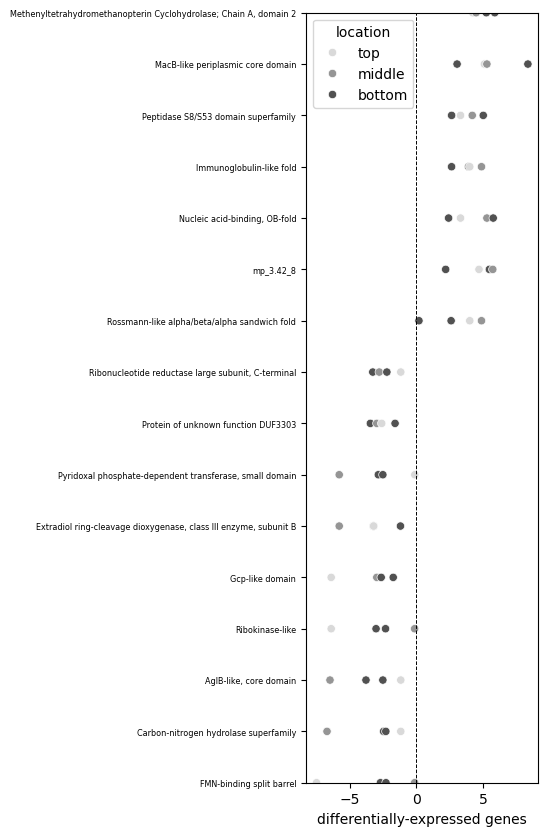

In [33]:
def plot_diff(diff_df:pd.DataFrame, genes:list=None, normalization='clr', annotations=dict(), legend:bool=True, hue:str='year', annotated_only:bool=False):
    
    fig, ax = plt.subplots(figsize=(3, 10))
    figure_df = diff_df[get_genes(diff_df, genes)].copy()
    # figure_df['gene'] = [str((row.target_name, row.gene_id)) for row in figure_df.itertuples()]
    figure_df['gene'] = [f'{row.target_name}.{row.gene_id}' for row in figure_df.itertuples()]
    sns.scatterplot(figure_df, y='gene', x=f'read_count_normalized_{normalization}_diff', hue=hue, palette='Grays', legend=legend)
    ax.axvline(0, color='black', lw=0.7, ls='--')

    annotations = {f'{target_name}.{gene_id}':annotation for (target_name, gene_id), annotation in annotations.items()}

    labels = [annotations.get(label.get_text(), label.get_text()) for label in ax.get_yticklabels()]
    # labels = [annotations.get(label.get_text(), label.get_text()) + f' ({label.get_text()})' for label in ax.get_yticklabels()]
    ax.set_yticks(ax.get_yticks(), labels, fontsize='xx-small')
    ax.set_ylabel('')
    ax.set_ylim(ymin=0, ymax=ax.get_yticks()[-1])
    ax.set_xlabel('differentially-expressed genes')
    plt.show()

# https://www.ebi.ac.uk/interpro/entry/InterPro/IPR006638/ 
# https://www.ebi.ac.uk/interpro/entry/InterPro/IPR006067/ 

nif_interproscan_df = interproscan_df[interproscan_df.signature_description.str.contains('Nif', case=True) & (interproscan_df.signature_description != 'Elp3/MiaA/NifB-like, radical SAM core domain')].drop_duplicates(['target_name', 'gene_id'])
nif_genes = set([(row.target_name, row.gene_id) for row in nif_interproscan_df.itertuples()])
nif_annotations = nif_interproscan_df.set_index(['target_name', 'gene_id']).signature_description.to_dict()

mp_1_genes = [(row.target_name, row.gene_id) for row in mp_metat_diff_df[mp_metat_diff_df.significantly_regulated & (mp_metat_diff_df.target_name == 'mp_1')].itertuples()]
mp_1_annotations = interproscan_df[get_genes(interproscan_df, mp_1_genes)].drop_duplicates(['target_name', 'gene_id']).set_index(['target_name', 'gene_id']).signature_description.to_dict()

mp_2_genes = [(row.target_name, row.gene_id) for row in mp_metat_diff_df[mp_metat_diff_df.significantly_regulated & (mp_metat_diff_df.target_name == 'mp_2')].itertuples()]
mp_2_annotations = interproscan_df[get_genes(interproscan_df, mp_2_genes)].drop_duplicates(['target_name', 'gene_id']).set_index(['target_name', 'gene_id']).signature_description.to_dict()

mp_5_genes = [(row.target_name, row.gene_id) for row in mp_metat_diff_df[mp_metat_diff_df.significantly_regulated & (mp_metat_diff_df.target_name == 'mp_5')].itertuples()]
mp_5_annotations = interproscan_df[get_genes(interproscan_df, mp_5_genes)].drop_duplicates(['target_name', 'gene_id']).set_index(['target_name', 'gene_id']).signature_description.to_dict()

mp_3_genes = [(row.target_name, row.gene_id) for row in mp_metat_diff_df[mp_metat_diff_df.significantly_regulated & (mp_metat_diff_df.target_name == 'mp_3')].itertuples()]
mp_3_annotations = interproscan_df[get_genes(interproscan_df, mp_3_genes)].drop_duplicates(['target_name', 'gene_id']).set_index(['target_name', 'gene_id']).signature_description.to_dict()

plot_diff(mp_metat_diff_df, genes=mp_3_genes, annotations=mp_3_annotations, hue='location')
# plot_diff(mp_metat_diff_df, genes=nif_genes, annotations=nif_annotations, hue='location')

